In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('dataset_SCL.csv')

c:\Users\Марія\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3257: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h3> Exploratory Data Analysis </h3>

In [4]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


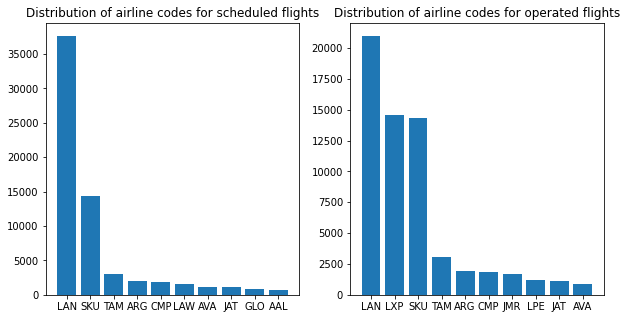

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(data['Emp-I'].value_counts().index.tolist()[:10], data['Emp-I'].value_counts().values.tolist()[:10]) 
axs[1].bar(data['Emp-O'].value_counts().index.tolist()[:10], data['Emp-O'].value_counts().values.tolist()[:10])

axs[0].set_title("Distribution of airline codes for scheduled flights")

axs[1].set_title("Distribution of airline codes for operated flights")


plt.show()

In [6]:
mask = (data['Emp-I']=='LAN') & ((data['Emp-O'] =='LXP'))
filtered = data.loc[mask]
filtered.shape

(14549, 18)

In [7]:
mask = (data['Emp-I']=='LAN') & ((data['Emp-O'] =='SKU'))
filtered = data.loc[mask]
filtered.shape

(0, 18)

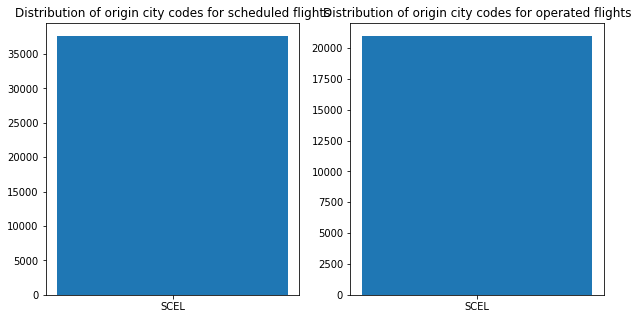

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(data['Ori-I'].value_counts().index.tolist()[:10], data['Emp-I'].value_counts().values.tolist()[:10]) 
axs[1].bar(data['Ori-O'].value_counts().index.tolist()[:10], data['Emp-O'].value_counts().values.tolist()[:10])

axs[0].set_title("Distribution of origin city codes for scheduled flights")

axs[1].set_title("Distribution of origin city codes for operated flights")


plt.show()

C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\3102475208.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(data['Des-I'].value_counts().index.tolist()[:10], rotation=45)
C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\3102475208.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(data['Des-O'].value_counts().index.tolist()[:10], rotation=45)


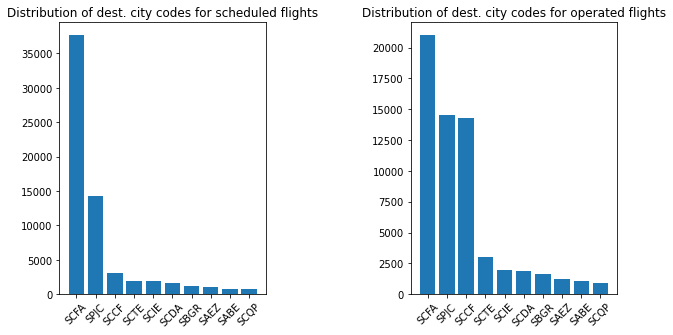

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.7)
axs[0].bar(data['Des-I'].value_counts().index.tolist()[:10], data['Emp-I'].value_counts().values.tolist()[:10]) 
axs[1].bar(data['Des-O'].value_counts().index.tolist()[:10], data['Emp-O'].value_counts().values.tolist()[:10])

axs[0].set_title("Distribution of dest. city codes for scheduled flights")

axs[1].set_title("Distribution of dest. city codes for operated flights")

axs[0].set_xticklabels(data['Des-I'].value_counts().index.tolist()[:10], rotation=45)
axs[1].set_xticklabels(data['Des-O'].value_counts().index.tolist()[:10], rotation=45)
plt.show()

Text(0.5, 1.0, 'Top-10 airlines')

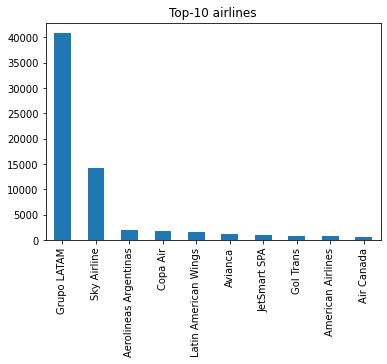

In [10]:
data['OPERA'].value_counts()[:10].plot(kind='bar')
plt.title('Top-10 airlines')

Text(0.5, 1.0, 'Distribution of types of flights')

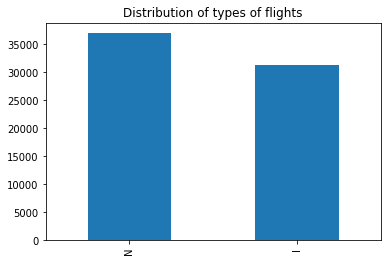

In [11]:
data['TIPOVUELO'].value_counts().plot(kind='bar')
plt.title('Distribution of types of flights')

In [12]:
data['SIGLAORI'].value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

Text(0.5, 1.0, 'Top-20 destinations')

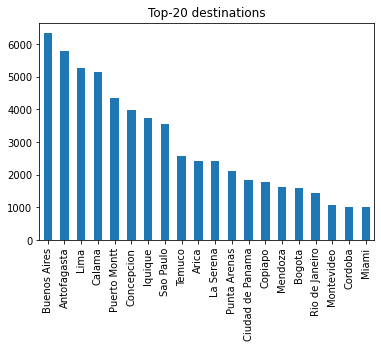

In [13]:
data['SIGLADES'].value_counts()[:20].plot(kind='bar')
plt.title('Top-20 destinations')

Text(0.5, 1.0, 'Distribution of months for flights')

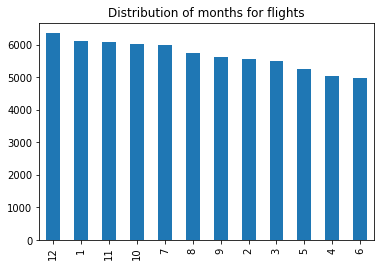

In [14]:
data['MES'].value_counts().plot(kind='bar')
plt.title('Distribution of months for flights')

Text(0.5, 1.0, 'Distribution of days for flights')

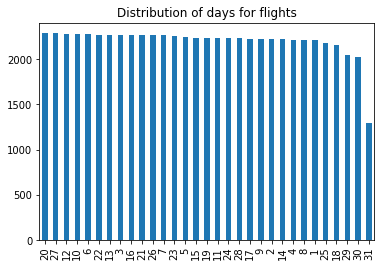

In [15]:
data['DIA'].value_counts().plot(kind='bar')
plt.title('Distribution of days for flights')

In [16]:
data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])

In [17]:
def time_of_year(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month < 8:
        return 'Summer'
    elif 9 <= month < 11:
        return 'Autumn'
    else:
        return 'Winter'

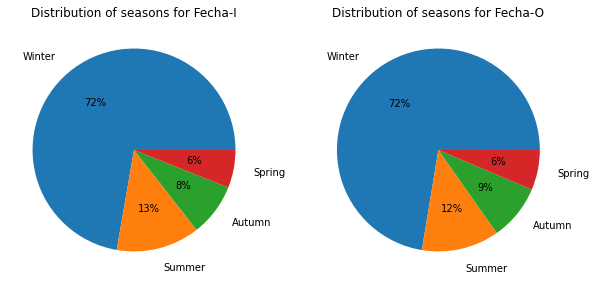

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

time_of_the_year1 = data['Fecha-I'].apply(lambda x: time_of_year(x.hour))
axs[0].pie(time_of_the_year1.value_counts(), labels=list(time_of_the_year1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

time_of_the_year2 = data['Fecha-O'].apply(lambda x: time_of_year(x.hour))
axs[1].pie(time_of_the_year2.value_counts(), labels=list(time_of_the_year1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

axs[0].set_title("Distribution of seasons for Fecha-I")

axs[1].set_title("Distribution of seasons for Fecha-O")


plt.show()


In [19]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 19:
        return 'afternoon'
    else:
        return 'night'

Text(0.5, 1.0, 'Distribution of hours for scheduled flights')

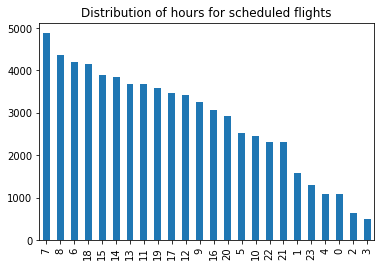

In [20]:
time = data['Fecha-I'].apply(lambda x: x.hour)
time.value_counts().plot(kind='bar')
plt.title('Distribution of hours for scheduled flights')

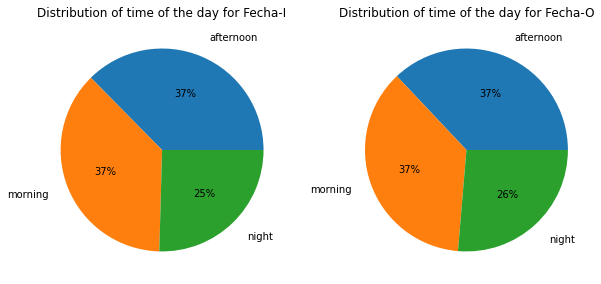

In [21]:
fig, axs1 = plt.subplots(1, 2, figsize=(10, 5))

time_of_the_day1 = data['Fecha-I'].apply(lambda x: time_of_day(x.hour))
axs1[0].pie(time_of_the_day1.value_counts(), labels=list(time_of_the_day1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

time_of_the_day2 = data['Fecha-O'].apply(lambda x: time_of_day(x.hour))
axs1[1].pie(time_of_the_day2.value_counts(), labels=list(time_of_the_day1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

axs1[0].set_title("Distribution of time of the day for Fecha-I")

axs1[1].set_title("Distribution of time of the day for Fecha-O")


plt.show()

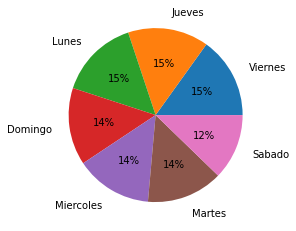

In [22]:
time_of_the_week = data['DIANOM']
frame1 = time_of_the_week.value_counts().plot(kind='pie', labels=list(time_of_the_week.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%')
frame1.axes.get_yaxis().set_visible(False) 

<h5> Conclusion </h5>

<ul>
  <li>LAN is the most popular airline code for both scheduled and operated flights. Most of the scheduled flights had to be organized by airlines with codes LAN and SKU.
In reality, operated flights were organized by airlines with codes LAN, LXP and SKU which leads to the conclusion that some part of the LAN flights was delayed and was organized by LXP or SKU (14549 flights were organized by LXP)  </li>
  <li>The origin city code is SCEL for both scheduled and operated flights.</li>
  <li>SCFA is the most popular destination city code for both scheduled and operated flights. For operated flights, SPJC and SCCF were also popular destinations.</li>
  <li>Most of the flights were organized by Group LATAM.</li>
  <li>Types of lights are evenly distributed.</li> 
<li>Origin of all flights is Santiago.</li> 
<li>Winter is the most popular season for flights.</li>
<li>Time of the day is evenly distributed, though more flights happened either in the morning or in the afternoon.</li> 
<li>Quantity of flights is evenly distributed across all days of the week. Fewer flights happened on Saturday.</li> 
</ul>

<h3> Generate new columns </h3>

In [23]:
from datetime import date

date1 = pd.to_datetime(date(2017, 12, 15))
date2 = pd.to_datetime(date(2017, 3, 3))
date3 = pd.to_datetime(date(2017, 7, 15))
date4 = pd.to_datetime(date(2017, 7, 31))
date5 = pd.to_datetime(date(2017, 9, 11))
date6 = pd.to_datetime(date(2017, 9, 30))

def is_high_season(date_input):
    return (date1 <= date_input <= date2) or (date3 <= date_input <= date4) or (date5 <= date_input <= date6)

In [24]:
data['high_season'] = data['Fecha-I'].apply(lambda x: is_high_season(pd.to_datetime(date(2017, x.month, x.day))))

<AxesSubplot:>

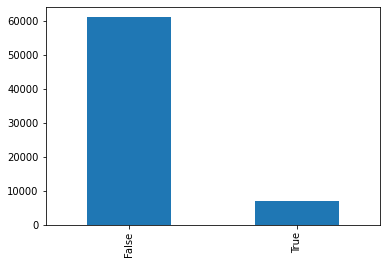

In [25]:
data['high_season'].value_counts().plot(kind='bar')

In [26]:
def cpl_calc(x):
    return pd.Timedelta(x["Fecha-O"] - x["Fecha-I"]).total_seconds() / 60

data["min_diff"] = data.apply(cpl_calc, axis=1)

In [27]:
data["delay_15"] = data["min_diff"].apply(lambda x: x > 15)

In [28]:
data["period_day"] = data["Fecha-I"].apply(lambda x: time_of_day(x.hour))

In [29]:
columns = ["high_season", "min_diff", "delay_15", "period_day"]

data.to_csv("synthetic_features.csv", columns=columns, index=False)

<h4> Behavior of the delay rate </h4>

In [30]:
data = data.drop(data[data["min_diff"] < 0].index)

In [31]:
max(data["min_diff"])

161.0

In [32]:
min(data["min_diff"])

0.0

In [33]:
data[data["min_diff"] == 0].shape

(4789, 22)

In [34]:
data.shape

(50296, 22)

In [35]:
data['min_diff'].mean()

13.717909972960076

<AxesSubplot:>

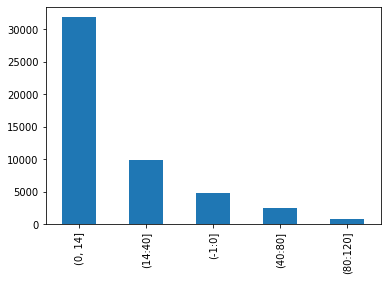

In [36]:
bins = [-1, 0, 14, 40, 80, 120, 161]
labels = ['(-1:0]','(0, 14]', '(14:40]', '(40:80]', '(80:120]', '(120:161]']
data['diff_ranges'] = pd.cut(x = data["min_diff"], bins = bins, labels = labels, include_lowest = True)
data['diff_ranges'].value_counts()[:5].plot(kind='bar')

In [37]:
def is_delayed(range):
    return range != '(-1:0]'

In [38]:
data['is_delayed'] = data['diff_ranges'].apply(lambda x: is_delayed(x))

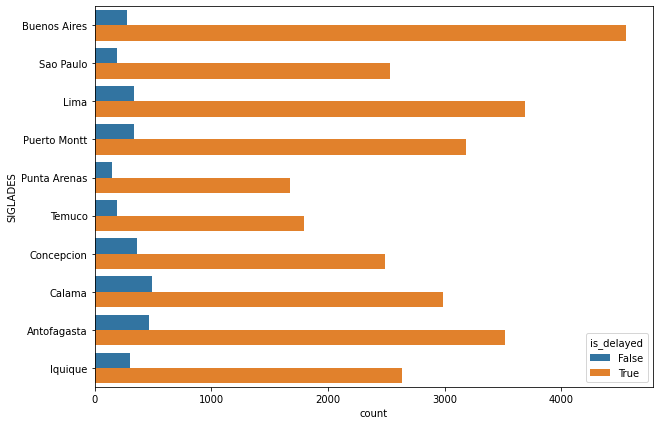

In [39]:
import seaborn as sns

keys = list(data["SIGLADES"].value_counts().keys()[:10])
data_filtered = data[data['SIGLADES'].isin(keys)]

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="SIGLADES", hue='is_delayed', data=data_filtered)
plt.show()

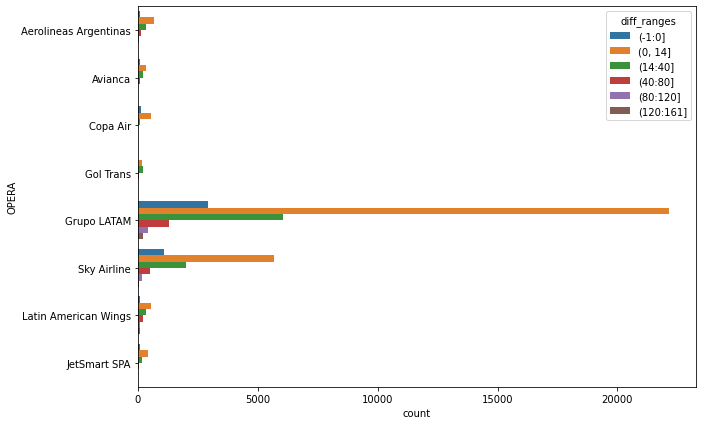

In [40]:
import seaborn as sns

keys = list(data["OPERA"].value_counts().keys()[:8])
data_filtered = data[data['OPERA'].isin(keys)]

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="OPERA", hue='diff_ranges', data=data_filtered)
plt.show()

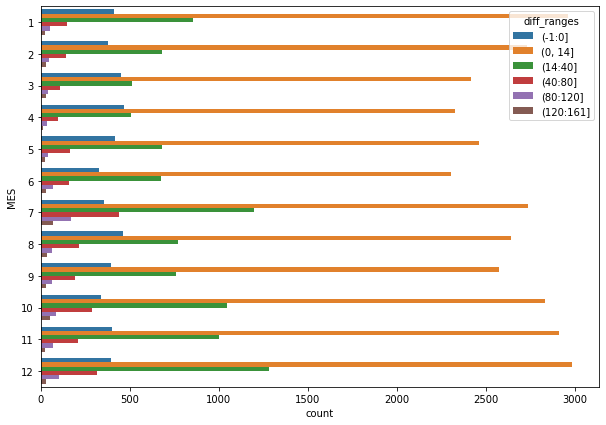

In [41]:
import seaborn as sns

keys = list(data["MES"].value_counts().keys())
data_filtered = data[data['MES'].isin(keys)]

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="MES", hue='diff_ranges', data=data_filtered)
plt.show()

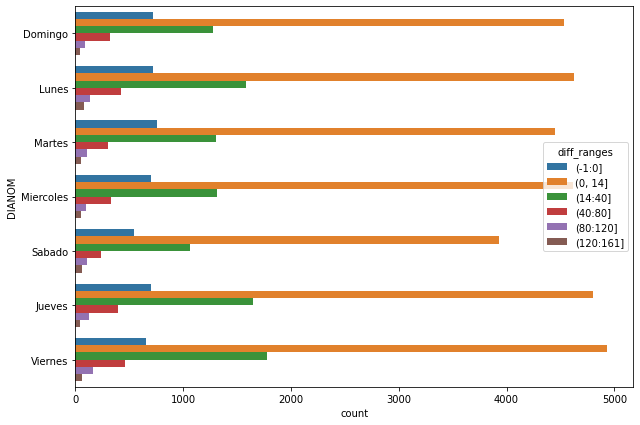

In [42]:
import seaborn as sns

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="DIANOM", hue='diff_ranges', data=data_filtered)
plt.show()

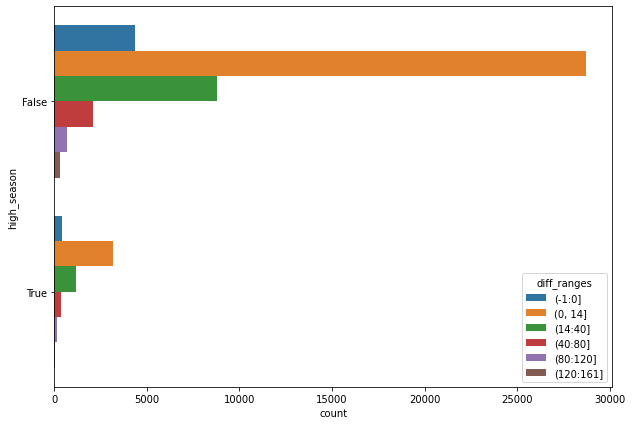

In [43]:
import seaborn as sns

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="high_season", hue='diff_ranges', data=data)
plt.show()

In [44]:
data['season'] = data['Fecha-I'].apply(lambda x: time_of_year(x.hour))

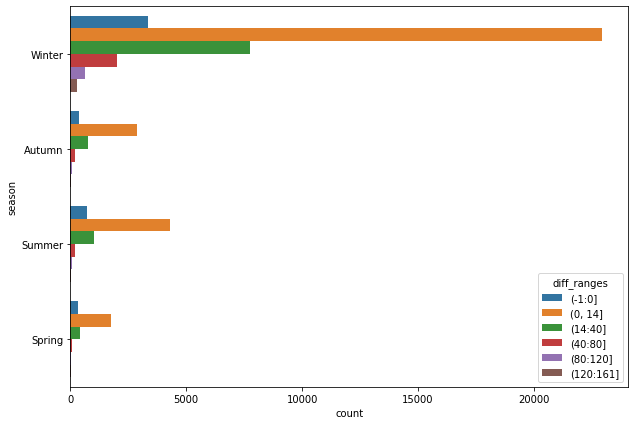

In [45]:
import seaborn as sns

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="season", hue='diff_ranges', data=data)
plt.show()

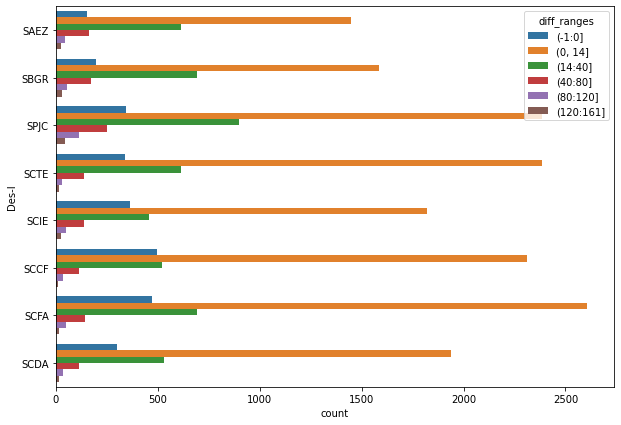

In [46]:
import seaborn as sns

keys= list(data["Des-I"].value_counts().keys()[:8])
data_filtered = data[data['Des-I'].isin(keys)]

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="Des-I", hue='diff_ranges', data=data_filtered)
plt.show()

In [47]:
data["MES"].value_counts()

12    5102
7     4966
10    4639
11    4611
1     4455
8     4180
9     4014
2     4007
5     3777
6     3554
3     3548
4     3443
Name: MES, dtype: int64

In [48]:
print('Delayed:', data[data['is_delayed'] == True].shape[0])
print('Not Delayed:', data[data['is_delayed'] == False].shape[0])

Delayed: 45507
Not Delayed: 4789


<h4> First conclusion </h4>

<p> Most of the flights happened in Winter, not in high season, by Grupo LATAM and the delay time lies in the range (0; 14]. We could assume that season influences the probability of the delay, but most of the not delayed flights also happened in Winter. 
  
  The dataset is imbalanced, the ratio of not delayed flights is only 10%. The number of records is evenly distributed for each month which means that we are given enough information for the year. My conclusion is that flights that take off from SCL tend to be delayed.
  
  Also, quantity of not delayed flights seems to be proportional to quantity of delayed flights across all columns. Let's check if that's true.
   </p>

In [49]:
def build_plot(param, type, constraint=None):
    keys = []
    if constraint != None:
        keys = list(data[param].value_counts().keys()[:constraint])
    else:
        keys = list(data[param].value_counts().keys())
    d1 = data[(data['is_delayed'] == False) & (data[param].isin(keys))][param].value_counts()
    d2 = data[(data['is_delayed'] == True) & (data[param].isin(keys))][param].value_counts()

    new_d2 = {i:0 for i in d1.keys()}
    d2_dict = dict(d2)
    for i in new_d2.keys():
        new_d2[i] = d2_dict[i]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    if type == 'line':
        ax1.plot(list(d1.keys()), d1.values) 

        ax2.plot(list(new_d2.keys()), new_d2.values())

    elif type == 'bar':
        ax1.bar(list(d1.keys()), d1.values) 

        ax2.bar(list(new_d2.keys()), new_d2.values())

    ax1.set_title(f'Distribution of {param} for not delayed flights')

    ax2.set_title(f'Distribution of {param} for delayed flights')

    ax1.set_xticklabels(list(d1.keys()), rotation=45)
    ax2.set_xticklabels(list(new_d2.keys()), rotation=45)

    plt.show()

C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\2865469491.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(d1.keys()), rotation=45)
C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\2865469491.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(new_d2.keys()), rotation=45)


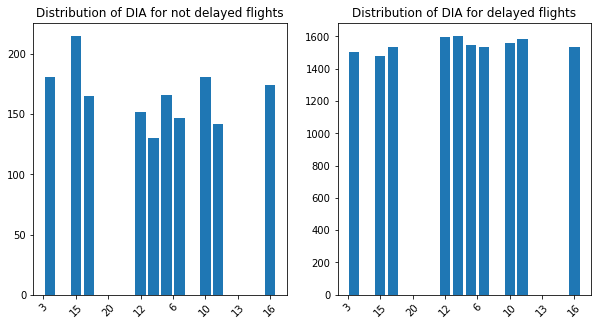

In [50]:
build_plot('DIA', 'bar', 10)

C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\2865469491.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(d1.keys()), rotation=45)
C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\2865469491.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(new_d2.keys()), rotation=45)


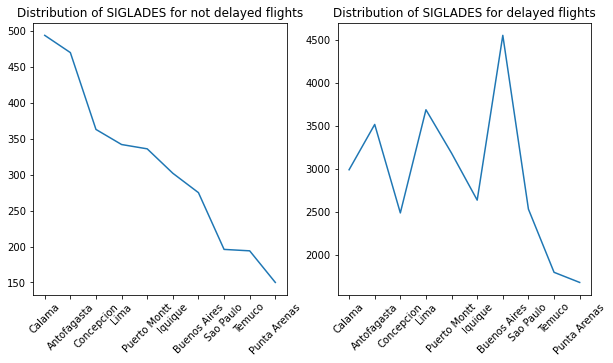

In [51]:
build_plot('SIGLADES', 'line', 10)

<p> From the above graphs we can see that the quantity of not-delayed flights for top-10 most popular destinations is not proportional to the quantity of delayed flights </p> 

C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\2865469491.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(d1.keys()), rotation=45)
C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\2865469491.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(new_d2.keys()), rotation=45)


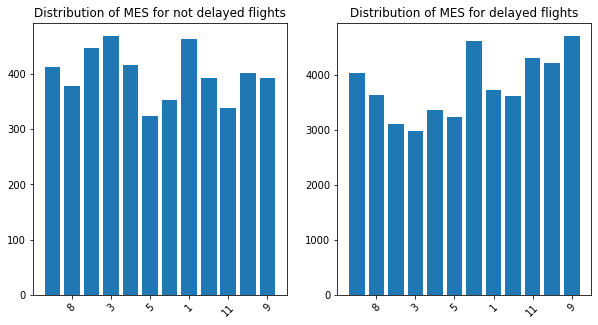

In [52]:
build_plot('MES', 'bar')

C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\2865469491.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(d1.keys()), rotation=45)
C:\Users\Марія\AppData\Local\Temp\ipykernel_17000\2865469491.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(new_d2.keys()), rotation=45)


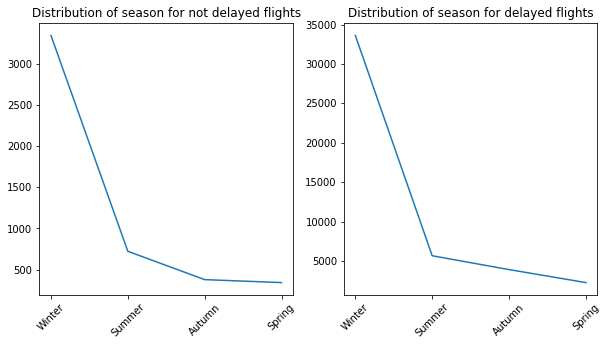

In [53]:
build_plot('season', 'line')

In [54]:
from scipy.stats import pearsonr

def find_correlation(var1):
    data1 = data[(data['is_delayed'] == False)][var1].value_counts()
    data2 = data[(data['is_delayed'] == True)][var1].value_counts()

    new_d2 = {i:0 for i in data1.keys()}
    d2_dict = dict(data2)
    for i in new_d2.keys():
        if d2_dict.get(i) != None:
            new_d2[i] = d2_dict[i]
        else:
            new_d2[i] = 0
    x1 = np.array(data1.values)
    x2 = np.array(list(new_d2.values()))
    corr, _ = pearsonr(x1, x2)
    return corr

In [55]:
cols = ['OPERA', 'SIGLADES', 'high_season', 'period_day', 'season', 'DIANOM', 'DIA', 'MES']

Correlation between quantities of delayed and not_delayed flights based on following params: OPERA, SIGLADDES, high_season, period_day,
season, DIANOM, DIA, MES

In [56]:
for param in cols:
    print(param, ':', find_correlation(param))

OPERA : 0.9959938024433439
SIGLADES : 0.9237844055822145
high_season : 1.0
period_day : 0.9557492689158298
season : 0.9987107385683862
DIANOM : 0.4195038677233166
DIA : 0.4991306637288911
MES : -0.4296014818261029


<h4> Second conclusion </h4>

<p> I would expect DIANOM, DIA, MES and SIGLADES have the most influence in predicting delays.
</p>

<h3> Building model </h3>

In [57]:
data['target'] = data['is_delayed'].apply(lambda x: int(x))

In [58]:
selected_columns = data[['DIANOM', 'DIA', 'MES', 'SIGLADES']]

In [59]:
selected_columns = data[['DIANOM', 'DIA', 'MES', 'SIGLADES']]

In [60]:
selected_columns

,DIANOM,DIA,MES,SIGLADES
0,Domingo,1,1,Miami
1,Lunes,2,1,Miami
2,Martes,3,1,Miami
3,Miercoles,4,1,Miami
5,Sabado,7,1,Miami
...,...,...,...,...
68201,Viernes,22,12,Lima
68202,Lunes,25,12,Lima
68203,Miercoles,27,12,Lima
68204,Viernes,29,12,Lima


In [61]:
features = list(selected_columns.to_dict(orient="index").values())

In [62]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()

In [80]:
X = vec.fit_transform(features).toarray()
y = np.array(data['target'])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
list(y_train).count(1)

30474

In [66]:
list(y_train).count(0)

3224

Decision tree

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

model_decision_tree = DecisionTreeClassifier(max_depth=40, class_weight={0:4.5,1:1})
model_decision_tree.fit(X_train, y_train)
model_decision_tree.score(X_train, y_train)

0.8442340791738382

In [68]:
y_pred = model_decision_tree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(model_decision_tree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.75


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  388  1177]
 [ 2958 12075]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.25      0.16      1565
           1       0.91      0.80      0.85     15033

    accuracy                           0.75     16598
   macro avg       0.51      0.53      0.51     16598
weighted avg       0.84      0.75      0.79     16598



In [82]:
model_LR = LogisticRegression(class_weight={0:4.5,1:1})
model_LR.fit(X_train, y_train)
model_LR.score(X_train, y_train)

c:\Users\Марія\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8972639325776011

In [83]:
y_pred1 = model_LR.predict(X_test)
print('Accuracy of logistic regression on test set: {:.2f}'.format(model_LR.score(X_test, y_test)))

Accuracy of logistic regression on test set: 0.90


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[   27  1538]
 [  111 14922]]


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.20      0.02      0.03      1565
           1       0.91      0.99      0.95     15033

    accuracy                           0.90     16598
   macro avg       0.55      0.50      0.49     16598
weighted avg       0.84      0.90      0.86     16598



In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

<h3> Conclusion </h3>

<h4> Choice of models </h4>
<p> LogisticRegression and DecisionTree are suitable for binary classification problems. The dataset is imbalanced, so it was necessary to adjust class weights so the model would get more penalty for incorrect prediction for minority class. </p>

<h4> Evaluation metrics </h4>
<p> The accuracy might be high, but in the case of imbalanced dataset we can't rely just on that metric. I built confusion matrix to see how much negative records were incorrectly classified. Also found precision and recall for both classes. </p>

<h4> Improvements </h4>
<p> Potentially we could also use a technique like SMOTE to generate records of minority class (not delayed flights) and make a dataset more balanced this way. </p>